<a href="https://colab.research.google.com/github/Vaish525/Works/blob/main/Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python


In [ ]:
from google.colab import files
uploaded = files.upload()
from google.colab.patches import cv2_imshow


Saving british 1.jpg to british 1 (1).jpg


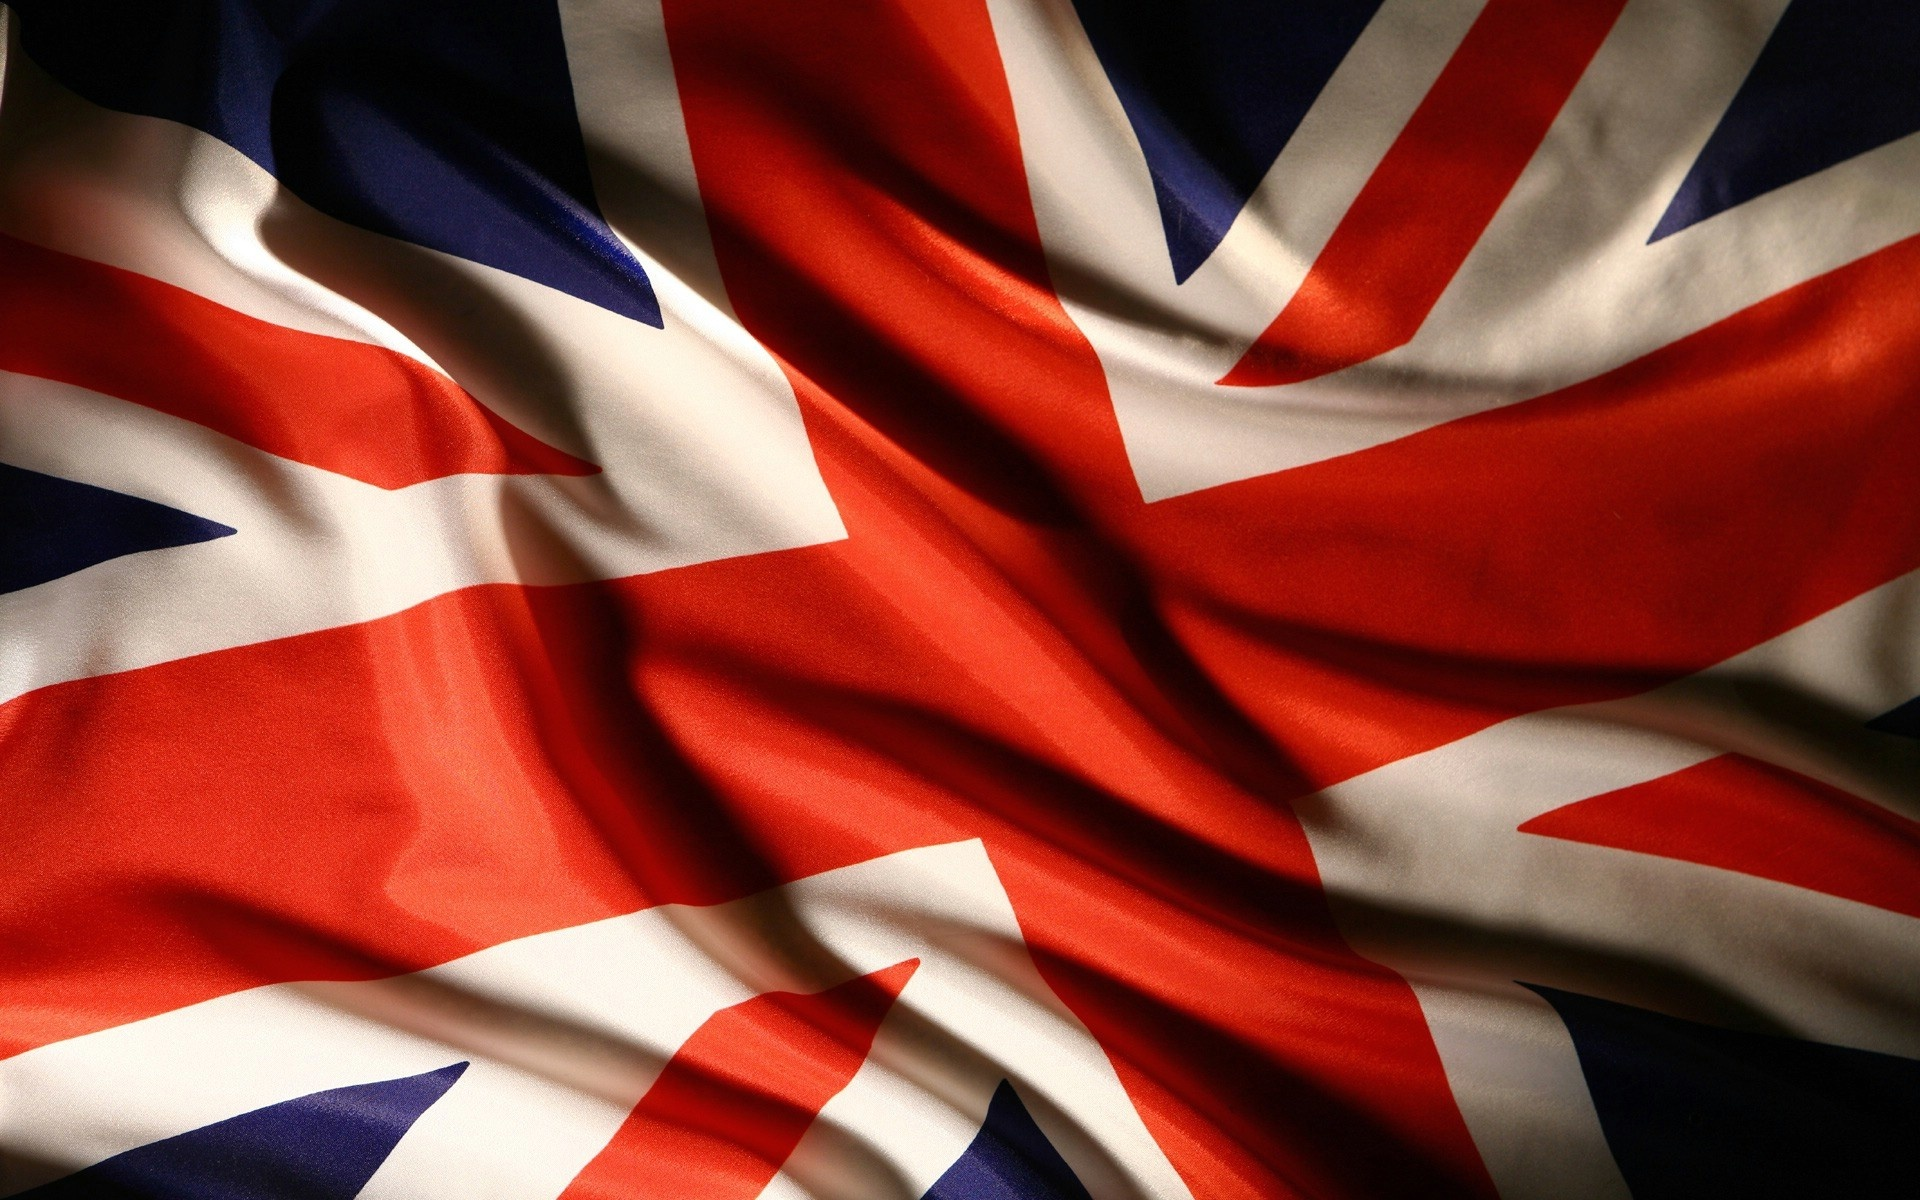

In [ ]:
import cv2
import numpy as np
from PIL import Image
import io

# Convert uploaded image to OpenCV format
for fname in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[fname]))
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    cv2_imshow(img_cv)  # Only works in Colab!


In [ ]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


In [ ]:
!wget -q https://github.com/TrailblazerAI/synaptic_os_models/raw/main/emotion_model.h5


In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving WIN_20250603_11_19_03_Pro.jpg to WIN_20250603_11_19_03_Pro.jpg
User uploaded file "WIN_20250603_11_19_03_Pro.jpg" with length 140314 bytes


In [ ]:
!pip install tensorflow opencv-python-headless numpy



In [ ]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


In [ ]:
!wget -q https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 -O emotion_model.h5


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WIN_20250603_11_19_03_Pro.jpg to WIN_20250603_11_19_03_Pro (1).jpg


In [ ]:
def predict_emotion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return {"error": "Image not loaded"}

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))  # resize to 64x64 as model expects
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)  # (64,64,1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)    # (1,64,64,1)

        prediction = model.predict(roi_reshaped)
        label_index = np.argmax(prediction)
        return {"emotion": emotion_labels[label_index]}



In [ ]:


from google.colab import files
uploaded = files.upload()

uploaded_filename = list(uploaded.keys())[0]

result = predict_emotion(uploaded_filename)
print(result)
print("Faces detected:", len(faces))



Saving WIN_20250603_11_19_03_Pro.jpg to WIN_20250603_11_19_03_Pro (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
{'emotion': 'Neutral'}


NameError: name 'faces' is not defined

In [ ]:
def predict_emotion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return {"error": "Image not loaded"}

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    print(f"Faces detected: {len(faces)}")   # print inside function

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)

        print("Input shape:", roi_reshaped.shape)
        print("Input pixel range:", np.min(roi_reshaped), np.max(roi_reshaped))

        prediction = model.predict(roi_reshaped)
        print("Raw prediction:", prediction)

        label_index = np.argmax(prediction)
        emotion = emotion_labels[label_index]
        print(f"Predicted emotion: {emotion}")
        return {"emotion": emotion}

# Now call your function and just print the result
result = predict_emotion(uploaded_filename)
print(result)


Faces detected: 2
Input shape: (1, 64, 64, 1)
Input pixel range: 0.16862746 0.9843137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Raw prediction: [[0.05941651 0.03732473 0.04568906 0.0022629  0.04120327 0.00203188
  0.8120717 ]]
Predicted emotion: Neutral
{'emotion': 'Neutral'}


In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok opencv-python-headless scikit-learn keras tensorflow



In [ ]:
import os

os.makedirs("model", exist_ok=True)
os.makedirs("uploads", exist_ok=True)



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

# Create a simple CNN model for emotion detection (dummy)
def create_emotion_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(7, activation='softmax')  # 7 emotions
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and save
emotion_model = create_emotion_model()

# Save the model
emotion_model.save('emotion_model.h5')

print("Emotion model saved as 'emotion_model.h5'")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Emotion model saved as 'emotion_model.h5'


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib

# Dummy training data
texts = ["open youtube", "play music", "what time is it", "set an alarm", "search google", "turn on light"]
labels = ["Play", "Play", "Question", "Schedule", "Search", "Control"]

# Create Bag-of-Words vectorizer
vectorizer = CountVectorizer()

# Vectorize texts
X = vectorizer.fit_transform(texts)

# Train a simple classifier
intent_model = MultinomialNB()
intent_model.fit(X, labels)

# Save both model and vectorizer
joblib.dump(intent_model, 'intent_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Intent model and vectorizer saved as 'intent_model.pkl' and 'vectorizer.pkl'")


Intent model and vectorizer saved as 'intent_model.pkl' and 'vectorizer.pkl'


In [ ]:
import os
os.makedirs('model', exist_ok=True)
!mv emotion_model.h5 model/
!mv intent_model.pkl model/
!mv vectorizer.pkl model/


In [ ]:
from tensorflow.keras.models import load_model
import joblib

emotion_model = load_model('model/emotion_model.h5')
intent_model = joblib.load('model/intent_model.pkl')
vectorizer = joblib.load('model/vectorizer.pkl')


In [ ]:
# predict_emotion.py

import cv2
import numpy as np
from keras.models import load_model

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
emotion_model = load_model("model/emotion_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

def predict_emotion(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=(0, -1))

        prediction = emotion_model.predict(roi_reshaped)
        label_index = np.argmax(prediction)
        return {"emotion": emotion_labels[label_index]}


In [ ]:
# intent_predictor.py

import joblib

vectorizer = joblib.load("model/vectorizer.pkl")
intent_model = joblib.load("model/intent_model.pkl")

def predict_intent(text):
    vec = vectorizer.transform([text])
    prediction = intent_model.predict(vec)
    return prediction[0]


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load models (make sure you uploaded these files in Colab or put the correct path)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
emotion_model = load_model("emotion_model.h5")  # Upload this in Colab Files tab
intent_model = joblib.load("intent_model.pkl")  # Upload this too

# Emotion labels as per your model's training
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

def predict_emotion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return {"error": "Image not loaded"}

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    print(f"Faces detected: {len(faces)}")

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)

        print("Input shape:", roi_reshaped.shape)
        print("Input pixel range:", np.min(roi_reshaped), np.max(roi_reshaped))

        prediction = emotion_model.predict(roi_reshaped)
        print("Raw prediction:", prediction)

        label_index = np.argmax(prediction)
        emotion = emotion_labels[label_index]
        print(f"Predicted emotion: {emotion}")
        return {"emotion": emotion}

def predict_intent(text):
    # Example: simple bag-of-words transform, then predict intent
    # You must have your vectorizer saved as 'vectorizer.pkl' and upload it too
    vectorizer = joblib.load("vectorizer.pkl")  # Upload this file
    text_vector = vectorizer.transform([text])
    pred = intent_model.predict(text_vector)
    return {"intent": pred[0]}


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load models
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
emotion_model = load_model("emotion_model.h5")
intent_model = joblib.load("intent_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

def predict_emotion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return {"error": "Image not loaded"}
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)
        prediction = emotion_model.predict(roi_reshaped)
        label_index = np.argmax(prediction)
        emotion = emotion_labels[label_index]
        return {"emotion": emotion}

def predict_intent(text):
    X = vectorizer.transform([text])
    intent = intent_model.predict(X)[0]
    return {"intent": intent}
    # Replace with your image filename



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WIN_20250603_11_19_03_Pro.jpg to WIN_20250603_11_19_03_Pro.jpg


In [ ]:
import os
print(os.listdir())  # Check filename

# Use the correct filename here:
result = predict_emotion("WIN_20250603_11_19_03_Pro.jpg")
print("Emotion:", result)


['.config', 'vectorizer.pkl', 'uploads', 'WIN_20250603_11_19_03_Pro.jpg', 'emotion_model.h5', 'intent_model.pkl', 'model', 'sample_data']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
Emotion: {'emotion': 'Neutral'}


In [ ]:
import joblib
import numpy as np

# Load vectorizer and model
vectorizer = joblib.load("vectorizer.pkl")         # Required for transforming raw text
intent_model = joblib.load("intent_model.pkl")     # Your trained intent classifier

def predict_intent(text):
    # Step 1: Vectorize the text input
    vect_input = vectorizer.transform([text])  # This becomes a numeric sparse matrix
    # Step 2: Predict using the model
    prediction = intent_model.predict(vect_input)
    return {"intent": prediction[0]}



In [ ]:
emotion = emotion_result['emotion']
intent = intent_result['intent']

# Simple rule-based response
if emotion == "Sad" and intent == "Play":
    print("You seem sad. Playing something to cheer you up 🎵")
elif intent == "Search":
    print("Sure! What would you like me to search?")
else:
    print(f"Detected intent: {intent} | Emotion: {emotion}")


Detected intent: Play | Emotion: Neutral


In [ ]:
# Example Inputs
image_path = "WIN_20250603_11_19_03_Pro.jpg"
user_input_text = "Open YouTube"

# Run predictions
emotion_result = predict_emotion(image_path)
intent_result = predict_intent(user_input_text)

# Show outputs
print("Emotion:", emotion_result)
print("Intent:", intent_result)
if intent_result['intent'] == "Play":
    if emotion_result['emotion'] in ["Sad", "Neutral"]:
        print("Let's brighten things up! Playing your favorite playlist 🎶")
    elif emotion_result['emotion'] == "Happy":
        print("Great vibes! Pumping up the energy with your tracks 🔥")
else:
    print(f"Detected intent: {intent_result['intent']} | Emotion: {emotion_result['emotion']}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Emotion: {'emotion': 'Neutral'}
Intent: {'intent': np.str_('Play')}
Let's brighten things up! Playing your favorite playlist 🎶


In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import nest_asyncio
nest_asyncio.apply()


In [ ]:
!ngrok authtoken 2y1mVJziDVQ7NgPi8msTCjrSKs7_3gMFmLp6HkncT8DSuieeb

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install fastapi uvicorn


In [ ]:
%%writefile main.py
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Hello from FastAPI in Colab!"}


Writing main.py


In [ ]:
!nohup uvicorn main:app --host 0.0.0.0 --port 8000 > output.log 2>&1 &


In [ ]:
!curl http://localhost:8000/


{"message":"Hello from FastAPI in Colab!"}

In [ ]:
from pyngrok import ngrok

fastapi_url = ngrok.connect(8000)
print("FastAPI public URL:", fastapi_url.public_url)


FastAPI public URL: https://1e8d-35-229-142-184.ngrok-free.app


In [ ]:
!pip install streamlit pyngrok


In [ ]:
%%writefile app.py
import streamlit as st

st.title("Streamlit App in Colab with ngrok")
st.write("Hello! This is running inside Google Colab.")


Writing app.py


In [ ]:
from pyngrok import ngrok

# Kill all existing tunnels
ngrok.kill()



In [ ]:
from pyngrok import ngrok
import subprocess
import time

# Kill old tunnels to avoid max tunnels error
ngrok.kill()

# Start Streamlit app in background
process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port=8501", "--server.headless=true"])

time.sleep(5)  # Give Streamlit time to start

# Open ngrok tunnel
streamlit_url = ngrok.connect(8501)
print("Streamlit public URL:", streamlit_url.public_url)


Streamlit public URL: https://b9f2-35-229-142-184.ngrok-free.app


In [ ]:
from fastapi import FastAPI, UploadFile, File, Form
from fastapi.responses import JSONResponse

app = FastAPI()

@app.post("/predict_emotion/")
async def predict_emotion_endpoint(image: UploadFile = File(...)):
    # Read image bytes, run your emotion model, return results
    contents = await image.read()
    result = predict_emotion_from_bytes(contents)  # your function to predict emotion from image bytes
    return JSONResponse(content=result)

@app.post("/predict_intent/")
async def predict_intent_endpoint(text: str = Form(...)):
    result = predict_intent(text)
    return JSONResponse(content=result)


In [ ]:
import streamlit as st
import requests

fastapi_url = "https://b9f2-35-229-142-184.ngrok-free.app"

st.title("Emotion and Intent Detector")

uploaded_file = st.file_uploader("Upload an image for emotion detection")
user_text = st.text_input("Enter text for intent prediction")

if uploaded_file is not None:
    files = {"image": uploaded_file.getvalue()}
    response = requests.post(f"{fastapi_url}/predict_emotion/", files={"image": uploaded_file})
    emotion_result = response.json()
    st.write("Emotion:", emotion_result)

if user_text:
    response = requests.post(f"{fastapi_url}/predict_intent/", data={"text": user_text})
    intent_result = response.json()
    st.write("Intent:", intent_result)


2025-06-04 04:40:36.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:40:36.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:40:36.776 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:40:36.778 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:40:36.779 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:40:36.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:40:36.787 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:40:36.790 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
if uploaded_file is not None:
    response = requests.post(f"{fastapi_url}/predict_emotion/", files={"image": uploaded_file})
    st.write("Status code:", response.status_code)
    st.write("Response text:", response.text)
    if response.status_code == 200:
        emotion_result = response.json()
        st.write("Emotion:", emotion_result)
    else:
        st.error("Error from API: " + response.text)


In [ ]:
from pyngrok import ngrok

# Kill previous tunnels if any (optional but clean)
ngrok.kill()

# Start a new tunnel to your local FastAPI port 8000
fastapi_url = ngrok.connect(8000)
print("New FastAPI URL:", fastapi_url)


New FastAPI URL: NgrokTunnel: "https://1b36-35-229-142-184.ngrok-free.app" -> "http://localhost:8000"


In [ ]:
import uvicorn

# Example: Run FastAPI app on port 8000
uvicorn.run("main:app", host="0.0.0.0", port=8000)


INFO:     Started server process [332]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [332]


In [ ]:
!curl http://localhost:8000


curl: (7) Failed to connect to localhost port 8000 after 0 ms: Connection refused


In [ ]:
ngrok.connect(8000)


<NgrokTunnel: "https://a5c8-35-229-142-184.ngrok-free.app" -> "http://localhost:8000">